# Week 09: Supervised Learning

## Drill

__Exercise:__ Explain what libraries that are used for the applications below? 
* Data visualisation
* Web scraping

__Solution:__ 
The are many libraries that do those tasks, but the following 
* Data visualisation: `matplotlib`, `seaborn`, `plotly`
* Web scraping: `requests`, `beautifulsoap`

__Exercise:__ In the following, print out the results (__in 2 decimal points__) using the `.format()` method or f-string. The computation is given to you.

In [ ]:
# Solution
def sum(ls): 
    i = 0
    s = 0
    while i < len(ls): 
        s += ls[i]
        i += 1
    return s
data01 = [0, 1, 4, 1, 2, 5, 2, 3, 4, 1]
avg = sum(data01)/len(data01)

print('{0:.2f}'.format(avg))
print(f'{avg:.2f}')

In [ ]:
def sum(ls): 
    i = 0
    s = 0
    while i < len(ls): 
        s += ls[i]
        i += 1
    return s
data01 = [0, 1, 4, 1, 2, 5, 2, 3, 4, 1]
avg = sum(data01)/len(data01)

# Your code below


## Recap

This is a continuum of previous 2 week topics. Remember from the CRISP-DM from week 7? We have done: 
* Forming data analytics/ science project ideas
* Finding datasets
* Understand the datasets from EDA
* Using statistics to understand datasets, this sometimes is part of EDA

This week and next week is under the __Modelling__ and __Evaluation__ steps of CRISP-DM. In this week, we are building a class of machine learning models under supervised learning. 

## Supervised Learning

Supervised learning is one type of machine learning. These algorithms look for a target variable. Remember from last week we talked about dependent variable? In machine learning the term target variable replaces this, while features replaces the term independent variables. For example, we predict the price of some goods based on the current features of production (e.g. size, temperature). 

Examples of supervised learning are
* regression
* classification

This week we will look into the machine learning/ prediction side of them. 

In this week, we will use a library called scikit-learn. Since it is a powerful and large package, we will have to import its submodules like the following: 
```python
from sklearn import ...
```

These will be mentioned in relevant sections. 

### But First...

Remember from week 7, every data analytics project starts from pre-processing the data. The most common steps are:

* Sample the data 
* Impute missing data
* Remove duplicate data
* Inconsistent data
* Standardise/ normalise numeric value
* Reduce dimensionality
* Add derived features
* Binning numeric value (into categories)
* Convert categorical variables into binary variables
* Select, combine, aggregate data

You must check if the dataset is good for feeding into the machine learning algorithm. This is what we called as __preprocessing__ data. Couple of the methods have been introduced in week 7 and we will talk about some more below (Encoding will be mentioned in classification). 

### Standardisation, Normalisation

Standardisation is one of the methods to make sure the data is within the same scale. For example, the highest and lowest data points are within the same digit. This method particularly ensures data is within a distribution of mean $0$ and standard deviation of $1$. The transformation is the same as z-score as from last week. 
$$Z\;=\;\frac{X\;-\;\mu}{\sigma}$$

We can standarise the data using `StandardScaler()` from scikit-learn. 

In [1]:
from sklearn.preprocessing import StandardScaler

X = [[1], [2], [3]]
scaler = StandardScaler()

The same data `X` above we can calculate the mean is 2 with standard deviation of 0.816. We can put this into the equation above. 

First we need to fit the data. 

In [2]:
scaler.fit(X)

StandardScaler()

You won't see any outputs, but the `.transform()` is what you are looking for. 

In [3]:
scaler.transform(X)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

Is it the same as what you calculated with the equation?

The other data transformation is called normalisation, which simply means we scale all data within $0$ and $1$. 

In [11]:
from sklearn import preprocessing

We can test this using a sample data that only have $0$ and $1$ and expect they won't change. 

In [8]:
preprocessing.normalize([[0, 0, 1]])

array([[0., 0., 1.]])

What if we change the highest data point? We can see it will scale back to $1$. 

In [9]:
preprocessing.normalize([[0, 0, 2]])

array([[0., 0., 1.]])

Finally we can use the data from standardisation (see the structure is different). 

In [10]:
# Run me (and change data to test)
preprocessing.normalize([[1, 2, 3]])

array([[0.26726124, 0.53452248, 0.80178373]])

### Imputation

Real data have many places where they are missing. In week 7 we know that this can be patched by __imputation__. This can be done by `SimpleImputer()`. 

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imp = SimpleImputer()

Let us use an example from previous. We have the same first and last data point, but the middle one is left out. 

In [7]:
import numpy as np

X = [[1], [np.nan], [3]]

So we try to fit and transform the data as before. 

In [8]:
imp.fit(X)

imp.transform(X)

array([[1.],
       [2.],
       [3.]])

You can see that the data is filled with $2$. This the mean of the remaining values ($1$ and $3$). We can also choose different strategies such as 
* mean
* median
* mode
* constant

Examples are from [offical docs](https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation). 

## Regression

Regression is one of the important examples of supervised learning, and you may have already using them. Regression forms a line (or plane) of predicted objects. When we know all the details of the independent variables, we can calculate the output from this. 

Let us use an example using below. The left column is the independent variable weight of caught fish this morning and the right hand column is the price that the fish market demands. 

| Weight (kg) | Price |
|-------------|-------|
| 10          | 21.5  |
| 15          | 31.5  |
| 20          | 41.5  |
| 22.5        | 46.5  |
| 30          | 61.5  |

Let us say your boat has caught $10$ kg of fish, you expect to get 21.5 dollars. What if your boat has caught 25 kg fish? You will try to intrapolate between the known data and you will get 51.5 dollars. 

### Ridge, Lasso and ElasticNet (Optional)

This week we will talk about serveral important linear regression algorithms. In mutiple regression, we are trying to find a line that has the least distance from all the data points. This is what is called fitting the data. Sometimes we may see the data does not have a linear relationship, or they autocorrelate and the line tries to fit them. If we include outliers or make the model with too many parameters (i.e. complex) then it may overfit. When new data comes in then the regression line does not predict them well because it considers too much of the outiers or did not encounter the real trend of data. 

This is where the ridge, lasso and ElasticNet comes in. They try to smooth the regression line or minimise the highly correlated parameters. We will look into how they work in coding. First, let us create the data from it. To make it non-linear, the dependent variable is a sine curve of the first independent variable. 

<AxesSubplot:>

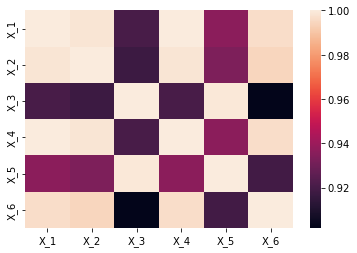

In [33]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import seaborn as sns

N = 45

X_1 = stats.uniform.rvs(loc=0, scale=3, size=N)
X_2 = X_1 + stats.norm.rvs(loc=1, scale=0.05, size=N)
X_3 = X_1 ** 3
X_4 = 1.5 * X_1
X_5 = X_1 + X_3
X_6 = X_1 * stats.norm.rvs(loc=1, scale=0.05, size=N)

X = pd.DataFrame({"X_1": X_1, "X_2": X_2, "X_3": X_3, "X_4": X_4, "X_5": X_5, "X_6": X_6})
y = 2 * np.sin(X_1) + np.sin(stats.norm.rvs(loc=0, scale=0.5, size=N))

sns.heatmap(X.corr())

As you can see from the heatmap all independent variables are highly correlated. 

Now let us create an (ordinary) linear regression model. 

In [34]:
from sklearn import linear_model
m0 = linear_model.LinearRegression()
results_m0 = m0.fit(X, y)

If we plot the model against one of the independent variables, we should find the line is very zig zag. That is because the random fluctuations come from fitting with other independent variables. 

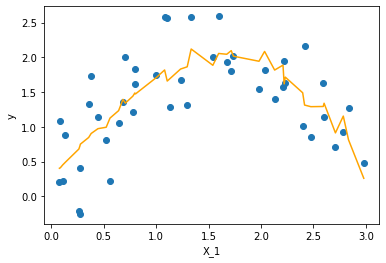

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_1, y)
plt.plot(np.sort(X_1), m0.predict(X.sort_values(by='X_1')), c='orange')
plt.xlabel('X_1')
plt.ylabel('y')
plt.show()

So the $R^2$ and coefficients of the OLS is. 

In [36]:
results_m0.score(X, y)

0.5626844327842466

In [37]:
print(results_m0.coef_, results_m0.intercept_)

[ 0.84682512 -0.0899066  -0.51547211  1.27023768  0.33135301 -1.40560802] 0.3697679611482665


Ridge regression tries to shrink the coefficients to the population mean, so that outliers or data with autocorrelation won't be affecting the regression too much. This can be done by a shrinkage coefficient $\alpha$ in the ridge regression and scikit-learn has a parameter for this. 

In [38]:
m1 = linear_model.Ridge(alpha=0.5).fit(X, y)

In [39]:
m1.score(X, y)

0.5465691907055142

In [40]:
print(m1.coef_, m1.intercept_)

[ 0.36777126  0.2908886  -0.26621966  0.55165689  0.1015516  -0.13275862] 0.05959359373779227


What does the shrinkage coefficient do? They smooth out the regression line to the middle of the scatter dots as below. We can see at higher values, the regression line becomes more smoother. However, it can become unfitted with the data if too smooth, such as $\alpha\;=\;100$. 

C:\Users\jy191\AppData\Local\Temp/ipykernel_11232/3233258672.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


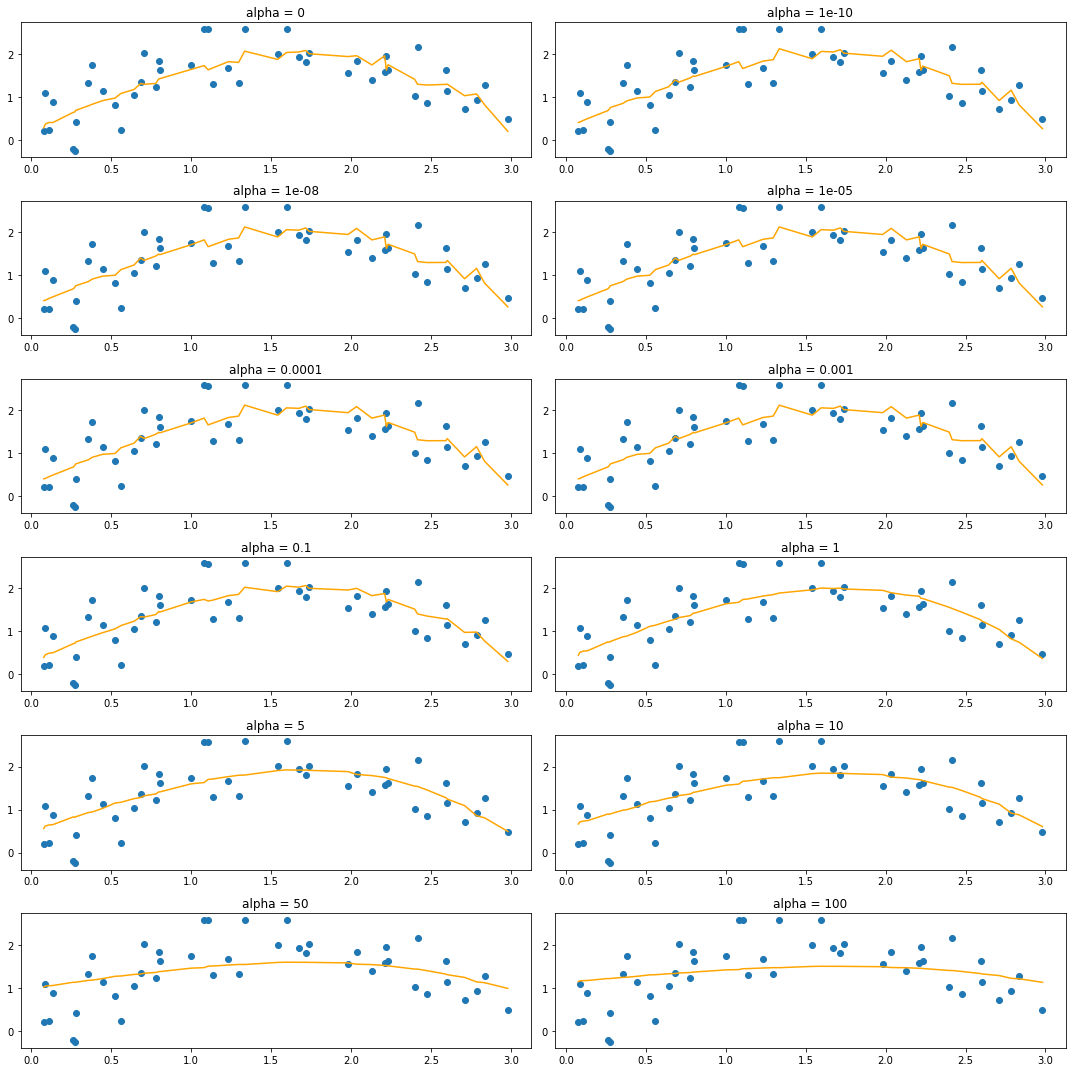

In [41]:
import matplotlib.pyplot as plt

alpha_ridge = [0, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 0.1, 1, 5, 10, 50, 100]

fig, ax = plt.subplots(6, 2,figsize=(15,15))
row_no = 0
col_no = 0

for row in ax:
    col_no = 0
    for col in row:
        col.title.set_text(f'alpha = {alpha_ridge[row_no * 2 + col_no]}')
        col.scatter(X_1, y)
        col.plot(np.sort(X_1), linear_model.Ridge(alpha=alpha_ridge[row_no * 2 + col_no]).fit(X, y).predict(X.sort_values(by='X_1')), c='orange')
        col_no += 1
    row_no += 1
    
fig.tight_layout()
fig.show()

The other type of regression is called Lasso regression, it tries to shrink independent variables that are insignificant. To see that we need the help of `statsmodels` from last week. 

In [49]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)

model.fit().summary()

C:\Users\jy191\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     12.87
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           8.02e-07
Time:                        14:56:33   Log-Likelihood:                -29.501
No. Observations:                  45   AIC:                             69.00
Df Residuals:                      40   BIC:                             78.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3698      1.374      0.269      0.789      -2.406       3.146
X_1            0.8468      0.497      1.702      0.096      -0.159       1.852
X_2           -0.0899      1.378     -0.065      0.948      -2.875       2.696
X_3           -0.5155      0.255     -2.020      0.050      -1.031       0.000
X_4            1.2702      0.746      1.702      0.096      -0.238       2.778
X_5            0.3314      0.243      1.364      0.180      -0.160       0.822
X_6           -1.4056      1.079     -1.302      0.200      -3.587       0.776
==============================================================================
Omnibus:                        0.563   Durbin-Watson:                   2.831
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.673
Skew:                           0.113   Prob(JB):                        0.714
Kurtosis:                       2.445   Cond. No.                     7.14e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can see that `X_1`, `X_3` and `X_4` are more significant than others. So the these parameters will survive while others go to zero. 

In [123]:
m2 = linear_model.Lasso(alpha=0.1).fit(X, y)

In [124]:
m2.score(X, y)

0.44439781271256884

In [125]:
print(m2.coef_, m2.intercept_)

[ 0.          0.         -0.09514315  0.56678466 -0.          0.        ] 0.7610082235646574


In above, we found that only `X_3` and `X_4` survives. Lasso regression tends to penalise those that are insignificant or autocorrelated. `X_1` did not survive, one reason could be because the coefficient from OLS is already low, and by shrinking them it will falls to 0 easily. 

The final model to be introduced is the ElasticNet. This is the combination of ridge and lasso. 

In [45]:
m3 = linear_model.ElasticNet().fit(X, y)

In [46]:
m3.score(X, y)

0.0

In [47]:
print(m3.coef_, m3.intercept_)

[ 0.  0. -0.  0.  0.  0.] 1.352609725976779


Let's compare the 3 models with their $R^2$ score. 

In [48]:
m0.score(X, y), m1.score(X, y), m2.score(X, y), m3.score(X, y)

(0.5626844327842466, 0.5465691907055142, 0.44439781271256884, 0.0)

__Exercise:__ When you finish the exercises in the classification section. Do a 

* (ordinary) linear regression
* ridge regression
* Lasso regression
* ElasticNet regression

with the full model and discuss the scores. 

__Solution:__ 

The scores are 

|            | Score       |
|------------|-------------|
| Ordinary   | 0.612906273 |
| Ridge      | 0.612906262 |
| Lasso      | 0.612906259 |
| ElasticNet | 0.516920054 |

Generally this sees a decrease in quality of model. The reason why that the newer models does not outperform the ordinary ones is where 

* the features are not correlated to each other
* The number of data points are sufficiently large compared to number of features. 

__Code:__
```python
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing

df = pd.read_csv('census_ind.csv',index_col='ID')

X = df.drop(columns='Salary')
y = df['Salary']

le = preprocessing.LabelEncoder()
le.fit(df['Gender'])
X['Gender'] = le.transform(df['Gender'])

le = preprocessing.LabelEncoder()
le.fit(df['Ethnic'])
X['Ethnic'] = le.transform(df['Ethnic'])

le = preprocessing.LabelEncoder()
le.fit(df['Religion'])
X['Religion'] = le.transform(df['Religion'])

le = preprocessing.LabelEncoder()
le.fit(df['Citizen'])
X['Citizen'] = le.transform(df['Citizen'])

le = preprocessing.LabelEncoder()
le.fit(df['Maternity'])
X['Maternity'] = le.transform(df['Maternity'])

le = preprocessing.LabelEncoder()
le.fit(df['Working'])
X['Working'] = le.transform(df['Working'])

le = preprocessing.LabelEncoder()
le.fit(df['Finding Work'])
X['Finding Work'] = le.transform(df['Finding Work'])

le = preprocessing.LabelEncoder()
le.fit(df['Care of Children'])
X['Care of Children'] = le.transform(df['Care of Children'])

le = preprocessing.LabelEncoder()
le.fit(df['Care of Family'])
X['Care of Family'] = le.transform(df['Care of Family'])

le = preprocessing.LabelEncoder()
le.fit(df['Self Employed'])
X['Self Employed'] = le.transform(df['Self Employed'])

le = preprocessing.LabelEncoder()
le.fit(df['Owned Entity'])
X['Owned Entity'] = le.transform(df['Owned Entity'])

le = preprocessing.LabelEncoder()
le.fit(df['Home Internet'])
X['Home Internet'] = le.transform(df['Home Internet'])

le = preprocessing.LabelEncoder()
le.fit(df['Dwell Type'])
X['Dwell Type'] = le.transform(df['Dwell Type'])


# OLS
print(linear_model.LinearRegression().fit(X, y).score(X, y))
# Ridge
print(linear_model.Ridge(alpha=0.5).fit(X, y).score(X, y))
# Lasso
print(linear_model.Lasso(alpha=0.1).fit(X, y).score(X, y))
# ElasticNet
print(linear_model.ElasticNet().fit(X, y).score(X, y))

```

## Classification

Classification is another way to predict data, and the target variable is categorical. There are many algorithms that predicts the categorical varibles: 

* Logistic Regression
* Naive Bayes
* Stochastic Gradient Descent
* Decision Tree
* Random Forest
* Support Vector Machine

### Example: Interpreting Results using Logistic Regression

Logistic regression is one of the easiest examples for classification. Remember from week 8 that we use a signoid curve to decide if something is a "yes" while others are a "no"? This is the basis of all the classification algorith, we use a function and a criteria to cut the fine line of decisions. 

This time we revisit logistic regression in the sense of decision making. This week we will use a (synthetic) dataset that contains individual information. The EDA is done in `census_ind.csv` in the `files` folder. Please have a look before starting this week's exercise. 

So let's import the data. 

In [148]:
import pandas as pd
df = pd.read_csv('files/census_ind.csv',index_col='ID')

The first exercise will look at $2$ independent variables and how they predict the personis working or not. 

In [158]:
X = df[['Hours of Work', 'Volunteered Hours']]
y = df['Working']

Now let us construct the model. 

In [52]:
from sklearn import linear_model
log_m = linear_model.LogisticRegression().fit(X, y)

Also the score the model. 

In [53]:
log_m.score(X, y)

1.0

It shows that by knowing hours of work and how long they volunteer in life we can know their work status. This is a danger to us because when new data comes in, it often does not fit with the explanation. Nevertheless, we shall predict the data. 

In [54]:
log_m.predict(X)

array(['Yes', 'Yes', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

The key of this exercise is we are going to plot the data and their decision. Our plan is
* The independent variables belong to both axes of plot. 
* We colour the data with the decision made by logistic regression. 

But the plot function does not like strings from the dependent variable, so we will encode them. This is done by `preprocessing.LabelEncoder()`. 

In [69]:
le = preprocessing.LabelEncoder()
le.fit(df['Working'])
y = le.transform(df['Working'])

C:\Users\jy191\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


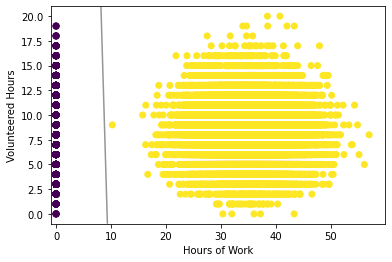

In [76]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X['Hours of Work'], X['Volunteered Hours'], c=y)

# Get decision boundary
xx, yy = np.mgrid[-1:60:.01, -1:21:.01]   # Create an empty grid
grid = np.c_[xx.ravel(), yy.ravel()]      # Flatten the array
probs = log_m.predict_proba(grid)[:, 1].reshape(xx.shape)
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1)

plt.xlabel('Hours of Work')
plt.ylabel('Volunteered Hours')
plt.show()

We can see from the plot above where the decision is made from the grey line. This is where the logistic regression line stays at $0.5$. The model is slightly not realistic when we know a person is working or not is when hours of work is less than $0$. The grey line is too above from this.  

### Example: Getting Started with Logistic Regression

There are many classification algorithms and one main focus this week is to introduce some of the main ones. Let us start with logistic regression and we will use the same dataset for all these exercises. Which we will classify whether a person earns 50000 dollars. 

In [6]:
X = df.drop(columns=['Salary'])
y = df['Salary'] > 50000

Logistic regression requires all columns are numerical, so we will need to encode them. 

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['Gender'])
X['Gender'] = le.transform(df['Gender'])

le = preprocessing.LabelEncoder()
le.fit(df['Ethnic'])
X['Ethnic'] = le.transform(df['Ethnic'])

le = preprocessing.LabelEncoder()
le.fit(df['Religion'])
X['Religion'] = le.transform(df['Religion'])

le = preprocessing.LabelEncoder()
le.fit(df['Citizen'])
X['Citizen'] = le.transform(df['Citizen'])

le = preprocessing.LabelEncoder()
le.fit(df['Maternity'])
X['Maternity'] = le.transform(df['Maternity'])

le = preprocessing.LabelEncoder()
le.fit(df['Working'])
X['Working'] = le.transform(df['Working'])

le = preprocessing.LabelEncoder()
le.fit(df['Finding Work'])
X['Finding Work'] = le.transform(df['Finding Work'])

le = preprocessing.LabelEncoder()
le.fit(df['Care of Children'])
X['Care of Children'] = le.transform(df['Care of Children'])

le = preprocessing.LabelEncoder()
le.fit(df['Care of Family'])
X['Care of Family'] = le.transform(df['Care of Family'])

le = preprocessing.LabelEncoder()
le.fit(df['Self Employed'])
X['Self Employed'] = le.transform(df['Self Employed'])

le = preprocessing.LabelEncoder()
le.fit(df['Owned Entity'])
X['Owned Entity'] = le.transform(df['Owned Entity'])

le = preprocessing.LabelEncoder()
le.fit(df['Dwell Type'])
X['Dwell Type'] = le.transform(df['Dwell Type'])

le = preprocessing.LabelEncoder()
le.fit(df['Home Internet'])
X['Home Internet'] = le.transform(df['Home Internet'])

Now let us fit the data. 

In [57]:
log_m1 = linear_model.LogisticRegression().fit(X, y)

C:\Users\jy191\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
log_m1.score(X, y)

0.9648524744328201

In [20]:
log_m1.coef_

array([[ 0.01586703,  0.0072802 , -0.00273424, -0.02579465, -0.02543603,
        -0.01677008, -0.00081009, -0.02423402,  0.03960856,  0.00099168,
        -0.01809332,  0.04450425, -0.12714743, -0.00578246, -0.02774402,
         0.37030089, -0.00229526, -0.02265816, -0.01150559, -0.0167867 ,
        -0.02370565]])

Afterwards we shall predict the 

__Exercise:__ Find out what does the model predicts for the ID 20?

In [25]:
# Solution
log_m1.predict([X.iloc[20,:]])  # Need extrac bracket as param requires 2D array. 

C:\Users\jy191\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [ ]:
# Your code below


### Example: Decision Tree

In [8]:
from sklearn import tree
dt = tree.DecisionTreeClassifier().fit(X, y)

```python
tree.plot_tree(rf)
```

<AxesSubplot:>

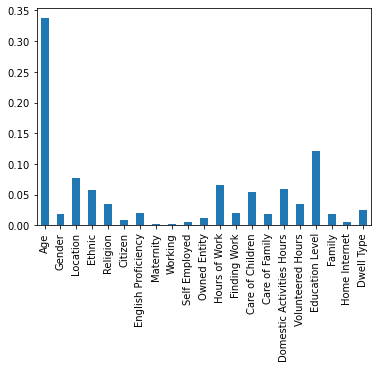

In [162]:
dt_feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
dt_feature_importances.plot.bar()

In [ ]:
dt.feature_importances_

In [ ]:
# Visualize the tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
display(graphviz.Source(export_graphviz(dt, feature_names=X.columns)))

In [63]:
dt_01 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(X, y)

[Text(209.25, 190.26, 'X[12] <= 0.5\nentropy = 0.22\nsamples = 42535\nvalue = [41040, 1495]'),
 Text(167.4, 135.9, 'X[15] <= 4.5\nentropy = 0.309\nsamples = 27009\nvalue = [25514, 1495]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 31.5\nentropy = 0.222\nsamples = 19849\nvalue = [19143, 706]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.166\nsamples = 17841\nvalue = [17404, 437]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.568\nsamples = 2008\nvalue = [1739, 269]'),
 Text(251.10000000000002, 81.53999999999999, 'X[17] <= 1.5\nentropy = 0.501\nsamples = 7160\nvalue = [6371, 789]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.824\nsamples = 2521\nvalue = [1870, 651]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.193\nsamples = 4639\nvalue = [4501, 138]'),
 Text(251.10000000000002, 135.9, 'entropy = 0.0\nsamples = 15526\nvalue = [15526, 0]')]

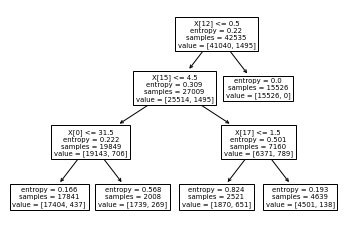

In [60]:
tree.plot_tree(dt_01)

<AxesSubplot:>

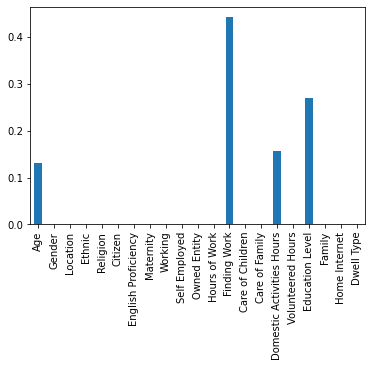

In [75]:
dt01_feature_importances = pd.Series(dt_01.feature_importances_, index=X.columns)
dt01_feature_importances.plot.bar()

In [64]:
dt.score(X, y)

1.0

In [65]:
dt_01.score(X, y)

0.9648524744328201

### Example: Random Forest (Optional)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3).fit(X, y)

In [67]:
rf.score(X, y)

0.9648524744328201

<AxesSubplot:>

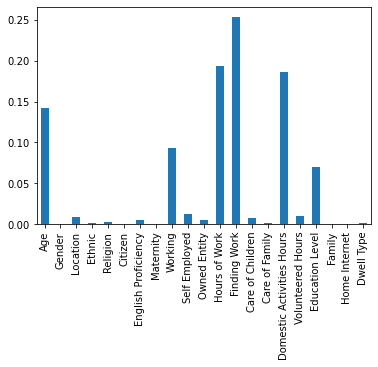

In [74]:
rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_feature_importances.plot.bar()

### Example: Naive Bayes (Optional)

In [178]:
from sklearn.naive_bayes import GaussianNB
nnb = GaussianNB().fit(X, y)

In [8]:
nnb.score(X, y)

0.43561772657811215

In [10]:
nnb.predict_proba(X)

array([[0.06438999, 0.93561001],
       [0.0106707 , 0.9893293 ],
       [0.00602504, 0.99397496],
       ...,
       [1.        , 0.        ],
       [0.01175204, 0.98824796],
       [1.        , 0.        ]])

### Confusion Matrix (Optional)

In [11]:
from sklearn.metrics import confusion_matrix

y_true = [1, 1, 0, 0]
y_pred = [1, 0, 1, 0]

confusion_matrix(y_true, y_pred)

array([[1, 1],
       [1, 1]], dtype=int64)

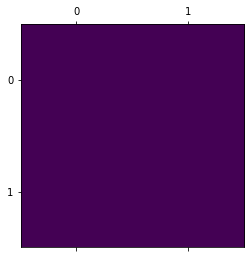

In [15]:
import matplotlib.pyplot as plt

plt.matshow(confusion_matrix(y_true, y_pred))
plt.show()

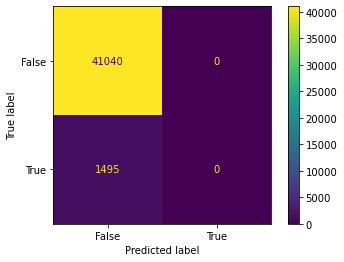

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_m1, X, y)

### Train and Test Datasets (Optional)

In [22]:
X

,Age,Gender,Location,Ethnic,Religion,Citizen,English Proficiency,Maternity,Working,Self Employed,...,Hours of Work,Finding Work,Care of Children,Care of Family,Domestic Activities Hours,Volunteered Hours,Education Level,Family,Home Internet,Dwell Type
ID,,,,,,,,,,,,,,,,,,,,,
0,26,0,2135,5,0,1,0.0,0,1,0,...,39.365005,0,32,2,4,7,6.0,2,1,4
1,21,1,2038,5,1,1,0.0,0,1,1,...,42.792924,0,33,2,3,9,8.0,2,1,1
2,28,0,2044,7,0,0,4.0,0,1,1,...,31.934240,0,32,2,5,13,7.0,3,1,4
3,26,0,2126,2,1,1,0.0,0,1,0,...,38.265747,0,36,2,4,11,1.0,2,1,2
4,20,2,2177,4,0,1,3.0,1,1,1,...,49.572851,0,12,2,2,14,10.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,24,1,2070,5,2,1,0.0,0,0,0,...,0.000000,1,32,2,3,12,3.0,2,1,4
42531,31,0,2093,5,1,1,0.0,1,0,0,...,0.000000,1,12,1,2,7,8.0,0,1,4
42532,19,0,2149,7,1,1,4.0,1,0,0,...,0.000000,1,16,2,2,10,7.0,1,1,3


In [14]:
from sklearn.model_selection import train_test_split

X_alt = [[0, 'a', 2], [1, 'b', 2], [2, 'c', 2]]
y_alt = [0, 0, 0]

X_train, X_test, y_train, y_test = train_test_split(X_alt, y_alt)
X_train, X_test, y_train, y_test

([[2, 'c', 2], [0, 'a', 2]], [[1, 'b', 2]], [0, 0], [0])

If you run the above code again, you will see the splited data becomes different. This is because the function will split the data randomly again. 

Let's try this on the example that we used in this week. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
X_train

,Age,Gender,Location,Ethnic,Religion,Citizen,English Proficiency,Maternity,Working,Self Employed,...,Hours of Work,Finding Work,Care of Children,Care of Family,Domestic Activities Hours,Volunteered Hours,Education Level,Family,Home Internet,Dwell Type
ID,,,,,,,,,,,,,,,,,,,,,
11796,23,0,2002,6,1,0,1.0,0,1,0,...,29.665665,0,33,0,3,6,8.0,1,1,3
20545,22,1,2020,5,2,0,0.0,0,0,0,...,0.000000,1,35,2,5,7,1.0,2,1,4
33807,28,2,2197,5,0,1,0.0,0,0,0,...,0.000000,1,35,2,4,8,1.0,2,1,4
35792,26,1,2212,5,0,1,0.0,1,0,0,...,0.000000,1,9,3,3,8,3.0,1,1,4
42494,19,1,2500,7,1,1,4.0,0,0,0,...,0.000000,1,34,3,6,5,4.0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,25,0,2075,5,1,1,0.0,0,1,0,...,32.078482,0,34,4,2,6,9.0,1,1,2
29211,17,0,2005,6,0,0,2.0,0,0,0,...,0.000000,1,32,2,4,3,10.0,1,1,3
24154,27,0,2017,5,2,1,0.0,0,1,0,...,29.411981,0,33,1,3,4,10.0,2,1,4


In [37]:
from sklearn import linear_model
m0 = linear_model.LogisticRegression().fit(X_train, y_train)

C:\Users\jy191\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
m0.score(X_train, y_train)

0.965236199492179

In [39]:
m0.score(X_test, y_test)

0.9637013353394771

### Validation Set in Cross Validation and Tuning Hyperparameters (Optional)

In [9]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid={'max_depth': [1, 2, 3], 'max_features': ['sqrt', 'log2']}, verbose=4)
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....max_depth=1, max_features=sqrt;, score=0.965 total time=   0.0s
[CV 2/5] END ....max_depth=1, max_features=sqrt;, score=0.965 total time=   0.0s
[CV 3/5] END ....max_depth=1, max_features=sqrt;, score=0.965 total time=   0.0s
[CV 4/5] END ....max_depth=1, max_features=sqrt;, score=0.965 total time=   0.0s
[CV 5/5] END ....max_depth=1, max_features=sqrt;, score=0.965 total time=   0.0s
[CV 1/5] END ....max_depth=1, max_features=log2;, score=0.965 total time=   0.0s
[CV 2/5] END ....max_depth=1, max_features=log2;, score=0.965 total time=   0.0s
[CV 3/5] END ....max_depth=1, max_features=log2;, score=0.965 total time=   0.0s
[CV 4/5] END ....max_depth=1, max_features=log2;, score=0.965 total time=   0.0s
[CV 5/5] END ....max_depth=1, max_features=log2;, score=0.965 total time=   0.0s
[CV 1/5] END ....max_depth=2, max_features=sqrt;, score=0.965 total time=   0.0s
[CV 2/5] END ....max_depth=2, max_features=sqrt;,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2']},
             verbose=4)

In [10]:
gs.best_estimator_, gs.best_score_

(DecisionTreeClassifier(max_depth=1, max_features='sqrt'), 0.9648524744328201)

In [11]:
gs.cv_results_

{'mean_fit_time': array([0.02238688, 0.02098746, 0.0221869 , 0.02198319, 0.02298636,
        0.02198739]),
 'std_fit_time': array([0.00646501, 0.00227931, 0.00074778, 0.00199731, 0.00252855,
        0.00189648]),
 'mean_score_time': array([0.00419798, 0.00519719, 0.00579653, 0.0044014 , 0.00539746,
        0.00599742]),
 'std_score_time': array([0.00097959, 0.00193827, 0.00159935, 0.00150193, 0.0019586 ,
        0.00189648]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'log2', 'sqrt', 'log2', 'sqrt', 'log2'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'max_features': 'sqrt'},
  {'max_depth': 1, 'max_features': 'log2'},
  {'max_depth': 2, 'max_features': 'sqrt'},
  {'max_depth': 2, 'max_features': 'log2'},
  {'m

In [174]:
gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid={'max_depth': [1, 2, 3], 'max_features': ['sqrt', 'log2']}, verbose=4)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....max_depth=1, max_features=sqrt;, score=0.966 total time=   0.0s
[CV 2/5] END ....max_depth=1, max_features=sqrt;, score=0.966 total time=   0.0s
[CV 3/5] END ....max_depth=1, max_features=sqrt;, score=0.966 total time=   0.0s
[CV 4/5] END ....max_depth=1, max_features=sqrt;, score=0.966 total time=   0.0s
[CV 5/5] END ....max_depth=1, max_features=sqrt;, score=0.966 total time=   0.0s
[CV 1/5] END ....max_depth=1, max_features=log2;, score=0.966 total time=   0.0s
[CV 2/5] END ....max_depth=1, max_features=log2;, score=0.966 total time=   0.0s
[CV 3/5] END ....max_depth=1, max_features=log2;, score=0.966 total time=   0.0s
[CV 4/5] END ....max_depth=1, max_features=log2;, score=0.966 total time=   0.0s
[CV 5/5] END ....max_depth=1, max_features=log2;, score=0.966 total time=   0.0s
[CV 1/5] END ....max_depth=2, max_features=sqrt;, score=0.966 total time=   0.0s
[CV 2/5] END ....max_depth=2, max_features=sqrt;,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2']},
             verbose=4)

In [175]:
gs.best_estimator_, gs.best_score_

(DecisionTreeClassifier(max_depth=1, max_features='sqrt'), 0.9660512227965172)

In [183]:
gs_alt = GridSearchCV(estimator=AdaBoostClassifier(), param_grid={'n_estimators': [1, 2, 3, 5]}, verbose=4)
gs_alt.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....................n_estimators=1;, score=0.966 total time=   0.0s
[CV 2/5] END ....................n_estimators=1;, score=0.966 total time=   0.0s
[CV 3/5] END ....................n_estimators=1;, score=0.966 total time=   0.0s
[CV 4/5] END ....................n_estimators=1;, score=0.966 total time=   0.0s
[CV 5/5] END ....................n_estimators=1;, score=0.966 total time=   0.0s
[CV 1/5] END ....................n_estimators=2;, score=0.966 total time=   0.0s
[CV 2/5] END ....................n_estimators=2;, score=0.966 total time=   0.0s
[CV 3/5] END ....................n_estimators=2;, score=0.966 total time=   0.0s
[CV 4/5] END ....................n_estimators=2;, score=0.966 total time=   0.0s
[CV 5/5] END ....................n_estimators=2;, score=0.966 total time=   0.0s
[CV 1/5] END ....................n_estimators=3;, score=0.966 total time=   0.0s
[CV 2/5] END ....................n_estimators=3;,

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 5]}, verbose=4)

In [184]:
gs_alt.best_estimator_, gs_alt.best_score_

(AdaBoostClassifier(n_estimators=1), 0.9660512227965172)

### Ensemble Methods (Optional)

In [207]:
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

estimators = [('tree', tree.DecisionTreeClassifier(max_depth=1, max_features='sqrt')), ('ridge', RidgeClassifier(alpha=1e-08, solver='svd')), ('ada', AdaBoostClassifier(n_estimators=1))]
final_estimator = GradientBoostingClassifier(n_estimators=12, subsample=0.5, min_samples_leaf=25, max_features=1, random_state=42)

In [208]:
from sklearn.ensemble import StackingClassifier

m_f = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
m_f.fit(X_train, y_train)

StackingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(max_depth=1,
                                                       max_features='sqrt')),
                               ('ridge',
                                RidgeClassifier(alpha=1e-08, solver='svd')),
                               ('ada', AdaBoostClassifier(n_estimators=1))],
                   final_estimator=GradientBoostingClassifier(max_features=1,
                                                              min_samples_leaf=25,
                                                              n_estimators=12,
                                                              random_state=42,
                                                              subsample=0.5))

In [209]:
y_pred = m_f.predict(X_test)

In [212]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.961256347564416


### Evaluate your Model (Optional)

Finally we should evaluate if what we have done fits the data best. From last week we used $R^2$, AIC and others to evaluate regression model. In this week we have seen couple of the evaluation metrics: 
* mean accuracy
* precision score
* statistical significance

This section will cover the rest of the methods to evaluate the models. This is called the Receiver Operating Characteristic (ROC). 

ROC tells at different hyperparameter settings how will the tradeoff between true positive rate (sensitivity) and false positive rate (specificity) holds. It forms a line that is the threshold of what will happen. So let us start. 

In [12]:
from sklearn.metrics import roc_curve

The function `roc_curve` looks for both the `y` values and the score of each corresponding values. This time we get them from one ridge classifier model (similar to one mentioned from regression, if you not sure of this then treat it as a different classifier). 

In [16]:
from sklearn.linear_model import RidgeClassifier
y_score = RidgeClassifier().fit(X_train, y_train).decision_function(X_test)

So we can calculate the true and false positive rates using them. 

$$\operatorname{TPR}\;=\;\frac{\operatorname{TP}}{\operatorname{TP}\;+\;\operatorname{FP}}$$

$$\operatorname{FPR}\;=\;\frac{\operatorname{FP}}{\operatorname{FP}\;+\;\operatorname{FN}}$$

Where $\operatorname{TP}$ is true positive, $\operatorname{FP}$ is false positive, $\operatorname{FN}$ is false negative. 

In [17]:
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())

We can also compute the area under the ROC. Because of fluctuations from classifying, this shows at different combinations of classification thresholds. The higher the AUC the better the classification algorithm to classify from the data. 

In [18]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.755796360294429

So now we can plot them and we can see what ROC looks like. 

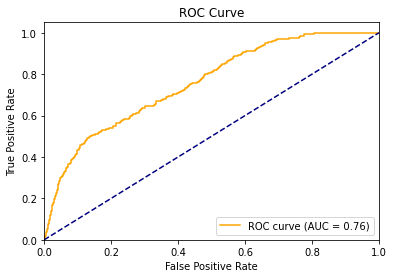

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color="orange", label="ROC curve (AUC = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

We observe the following: 
* The line starts from botton left and goes to top right. You can prove that when all data is true positive then in the equation for false positive rate, there is no data that can be false negative (because they are predicted to be true). 
* ROC increases monotonically. 

We can also possess ROC curves by calculating the true and false positive rates for different models (with different hyperparameters). In the following we change the depth from the decision tree. 

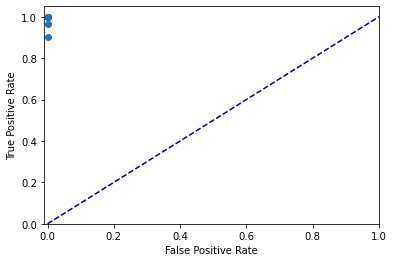

In [50]:
import numpy as np

from sklearn import tree

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1)

tpr = []
fpr = []

max_depth = [5, 10, 20, 50, 100, 150]

for i in range(len(max_depth)):
    y_pred = tree.DecisionTreeClassifier(max_depth=max_depth[i]).fit(X, y).predict(X)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    
    tpr.append(tp/(tp+fp))
    fpr.append(fp/(fp+tn))

plt.figure()
plt.scatter(fpr, tpr)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

We can see the curve reaches to the top very early. 

The other main category of evaluating classification models is to look at the business rules. For example, we can look at the range of predicted data or other characteristics using EDA. 

## Application: Classifying Texts

Now we have gone through the techniques of supervised learning, let us apply them on classifying texts. In this week, we will look at classifying positive and negative texts. This is useful when we are trying to find negative comments, fake news or spamming messages. 

In these examples it requires text data as inputs. Text is not numerical so we need to convert them to quantitative data. `sklearn` offers `.CountVectorizer()` which converts texts into their frequency counts. Let us see an example. 

In [17]:
# Try me
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["Here’s to your health and the New Year.", 
          "Although it wasn't a pot of gold, Nancy was still enthralled at what she found at the end of the rainbow.", 
          "You have every right to be angry, but that doesn't give you the right to be mean.", 
          "The hand sanitizer was actually very cold.", 
          "Sometimes you have to just give up and win by cheating.", 
          "The blinking lights of the antenna tower came into focus just as I heard a loud snap.", 
          "After a long talk, they decided to break up.", 
          "She couldn't decide of the glass was half empty or half full so she drank it.", 
          "Malls are great places to shop; I can find everything I need under one roof.", 
          "His eyes met mine on the street.", 
          "She is never happy until she finds something to be unhappy about; then, she is overjoyed.", 
          "She had that tint of craziness in her soul that made her believe she could actually make a difference.", 
          "Where do I put this box?", 
          "Mary plays the little lamb.", 
          "It isn't difficult to do a handstand if you just stand on your hands."]

vectoriser = CountVectorizer()  # We generate the CountVectorizer object first and use it to count from `corpus`
X = vectoriser.fit_transform(corpus)

The cell outputs a term-document matrix which shows the frequency of words appeared. This is done by `.fit_transform()`. Now `X` contains the frequency data and if we simply print it, it does not print the data that we wanted. The `CountVectorizer()` has an attribute called `vocabulary_` (There is an underscore at the end) which shows the frequency of each words appeared. 

In [18]:
vectoriser.vocabulary_

{'here': 56,
 'to': 111,
 'your': 125,
 'health': 53,
 'and': 4,
 'the': 106,
 'new': 80,
 'year': 123,
 'although': 3,
 'it': 63,
 'wasn': 119,
 'pot': 88,
 'of': 81,
 'gold': 44,
 'nancy': 77,
 'was': 118,
 'still': 102,
 'enthralled': 33,
 'at': 9,
 'what': 120,
 'she': 94,
 'found': 40,
 'end': 32,
 'rainbow': 90,
 'you': 124,
 'have': 52,
 'every': 34,
 'right': 91,
 'be': 10,
 'angry': 5,
 'but': 15,
 'that': 105,
 'doesn': 29,
 'give': 42,
 'mean': 74,
 'hand': 48,
 'sanitizer': 93,
 'actually': 1,
 'very': 117,
 'cold': 20,
 'sometimes': 99,
 'just': 64,
 'up': 116,
 'win': 122,
 'by': 16,
 'cheating': 19,
 'blinking': 12,
 'lights': 66,
 'antenna': 6,
 'tower': 112,
 'came': 17,
 'into': 60,
 'focus': 39,
 'as': 8,
 'heard': 54,
 'loud': 69,
 'snap': 96,
 'after': 2,
 'long': 68,
 'talk': 104,
 'they': 108,
 'decided': 25,
 'break': 14,
 'couldn': 22,
 'decide': 24,
 'glass': 43,
 'half': 47,
 'empty': 31,
 'or': 84,
 'full': 41,
 'so': 97,
 'drank': 30,
 'malls': 72,
 'are': 

Too difficult to read all of them? You can visualise them with a bar plot. 

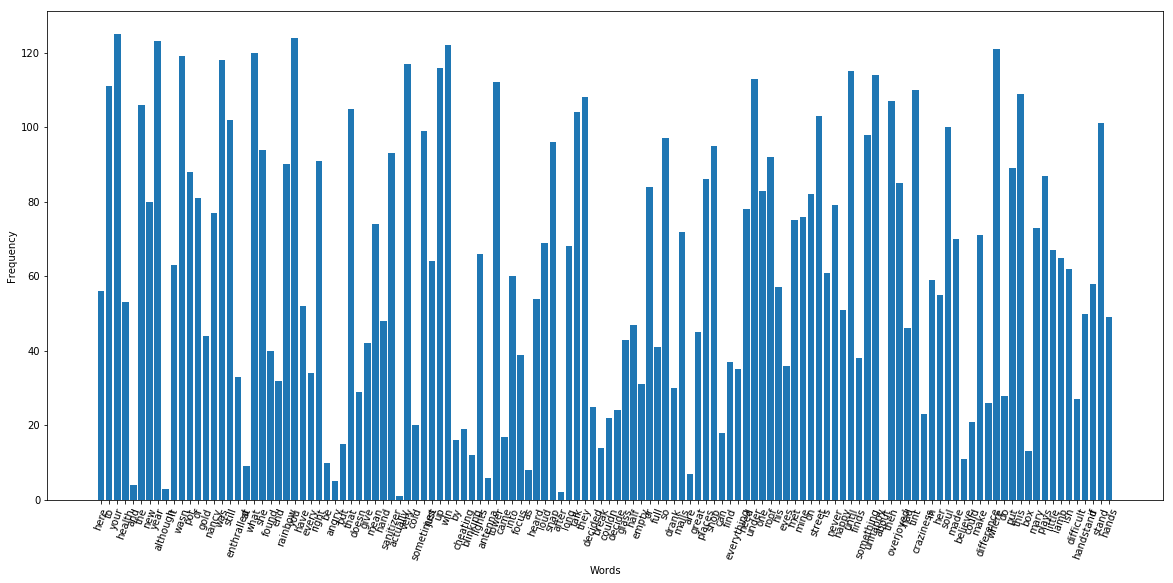

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,9))
plt.bar(range(len(vectoriser.vocabulary_)), list(vectoriser.vocabulary_.values()), align='center')
plt.xticks(range(len(vectoriser.vocabulary_)), list(vectoriser.vocabulary_.keys()), rotation=70)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

You can see that there are many words. Some of them are not necessary: They are the minor words that we use in conversations such as "and", "I" but they do not span anything meaningful. These are called __stopping words__ and too many unecessary words can contaminate our data quality. We can remove them in our analysis with the keyword `stop_words`. Let's see this in below: 

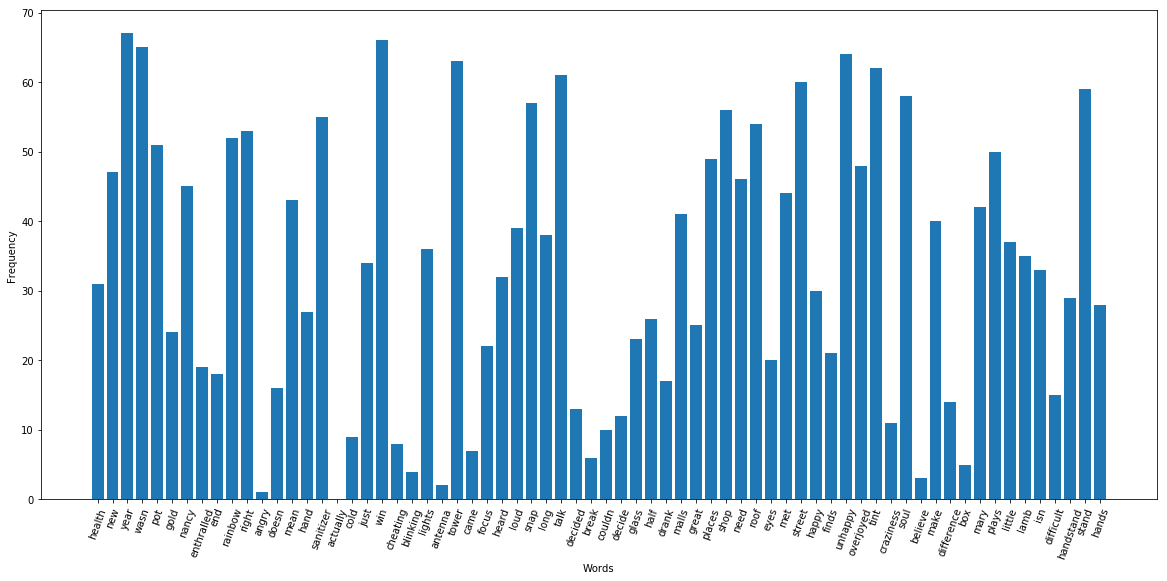

In [20]:
# Try me
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

vectoriser = CountVectorizer(stop_words="english")  # 
X = vectoriser.fit_transform(corpus)

plt.figure(figsize=(20,9))
plt.bar(range(len(vectoriser.vocabulary_)), list(vectoriser.vocabulary_.values()), align='center')
plt.xticks(range(len(vectoriser.vocabulary_)), list(vectoriser.vocabulary_.keys()), rotation=70)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

Of course, since we are doing a supervised learning. Let us add the target variables. In this exercise, we are trying to find whether the texts are from a particular person or not. Hence we are able to recognise words choice of that person. In the following, we transformed the data so that it includes another column called `flag`. If `flag` is 1 then this means it is from that person, where else is 0. So let us obtain the data. 

In [21]:
# Run to get the data
text_data = [("Here's to your health and the New Year.", 0), 
          ("Although it wasn't a pot of gold, Nancy was still enthralled at what she found at the end of the rainbow.", 0), 
          ("You have every right to be angry, but that doesn't give you the right to be mean.", 0), 
          ("The hand sanitizer was actually very cold.", 1), 
          ("Sometimes you have to just give up and win by cheating.", 1), 
          ("The blinking lights of the antenna tower came into focus just as I heard a loud snap.", 0), 
          ("After a long talk, they decided to break up.", 0), 
          ("She couldn't decide of the glass was half empty or half full so she drank it.", 1), 
          ("Malls are great places to shop; I can find everything I need under one roof.", 0), 
          ("His eyes met mine on the street.", 0), 
          ("She is never happy until she finds something to be unhappy about; then, she is overjoyed.", 0), 
          ("She had that tint of craziness in her soul that made her believe she could actually make a difference.", 0), 
          ("Where do I put this box?", 0), 
          ("Mary plays the little lamb.", 0), 
          ("It isn't difficult to do a handstand if you just stand on your hands.", 0),
          ("I made an effort to smile in front of others.",0),
          ("After exploring the abandoned building, he started to believe in ghosts. Sometimes he cannot sleep in night.",0),
          ("I don't except anybody who can tell the difference between Pepsi and Coke.",0),
          ("You can tweet whatever you want, at any time you want, as often as you want.",0),
          ("I was so mad that I yelled at him at the top of my lungs.",0),
          ("Your mom is so nice she gave me a ride home today. We had a chat.",0),
          ("What I remember is that she was with us at 8 pm. After that we have not heard anything.",0),
          ("There are few things better in life than a slice of pie.",1),
          ("Generally speaking, a woman will live longer than a man. Statistics shows that on average woman live around 80 years while men live around 84 years.",0),
          ("We have been convinced of this because the people who own everything also own the news.",0),
          ("This company is listed on the Paris stock exchange.",0),
          ("We have a big stove which keeps us very toasty.",0),
          ("Wes likes watching old movies on Sunday nights. This is when we sit together as a family.",0),
          ("I haven’t heard anything about him since you wrote to me.",0),
          ("Tom and Mary shared an umbrella However, it wasn't big enough and they both got wet.",0)
            ]
test_data = ["Tom and Mary shared an umbrella However, it wasn't big enough and they both got wet.", 
          "Although it wasn't a pot of gold, Nancy was still enthralled at what she found at the end of the rainbow.", 
          "You have every right to be angry, but that doesn't give you the right to be mean.", 
          "Excuse me sir I would like you to get me another drink.", 
          "Thank you for finishing the last slice of pizza!", 
          "The blinking lights of the antenna tower came into focus just as I heard a loud snap.", 
          "Mary plays the little lamb.", 
          "She had that tint of craziness in her soul that made her believe she could actually make a difference.", 
          "Malls are great places to shop; I can find everything I need under one roof.", 
          "His eyes met mine on the street.", 
          "She is never happy until she finds something to be unhappy about; then, she is overjoyed.", 
          "She couldn't decide of the glass was half empty or half full so she drank it.", 
          "Where do I put this box?",
          "25 years later, she still regretted that specific moment.",
          "As the rental car rolled to a stop on the dark road, she looked back to us.", 
          "That is an appealing treasure map that I can't read."
            ]

__Exercise:__ Write a code so that it transforms the data into a term-document matrix. 

In [ ]:
# Solution
vectoriser = CountVectorizer()  # We generate the CountVectorizer object first and use it to count from `corpus`
X = vectoriser.fit_transform([x[0] for x in text_data])

In [ ]:
# Your code below
vectoriser = 


__Exercise:__ Texts are unstructure data, then why do we classify this exercise as supervised learning?

__Solution:__ The confusion here is that we link unstructure data into unsupervised learning. Truely it is hard to find the target variable from text variables. In this exercise, we entail each messages with a target variable, which is it is positive or not. 

We can now apply the machine learning into the term-document matrix. In here, you can choose either logistic regression or random forest or anything else. The part that you have to realise is, we still have the target variable to use. 

Before we finish this, let us talk about an adjustment to the count vectoriser. `sklearn` offers another vectoriser object called Term Frequency Inverse Document Frequency (TF-IDF). For example [this document](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a). 

__Exercise:__ This is often said to be improving the machine learning model. Why is that?

__Solution:__ TF-IDF weighs more if the word appears more in a text piece/ document, but other documents might be irrelevant to this and does not include this specific keyword. TF-IDF optimises the results by rewarding the individual documents that are more relevant to topics. 

## Conclusion